In [278]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes, svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fighter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [279]:
my_data = pd.read_csv('train.csv')
my_data.shape
my_data.head(5)

,Question,Tag
0,The expression large frac x y x y 2 is equal t...,Absolute Value
1,If x is real and mid x 2 2x 3 mid 11 then poss...,Absolute Value
2,If mid 4X 7 mid 5 then the values of 2 mid X ...,Absolute Value
3,An Abstract Data Type ADT is same as an abstra...,Abstract Data Type
4,The number of full and half adders required to...,Adder


In [280]:
pd.DataFrame(my_data.Tag.unique()).values

array([['Absolute Value'],
       ['Abstract Data Type'],
       ['Adder'],
       ['Aliasing'],
       ['Array Multiplier'],
       ['Arrays'],
       ['B Tree'],
       ['Bayes Theorem'],
       ['Binary Operation'],
       ['Binary Search Tree'],
       ['Binary Tree'],
       ['Binomial Distribution'],
       ['Boolean Algebra'],
       ['Boolean Expressions'],
       ['Boolean Operations'],
       ['Booth Recoding'],
       ['Booths Algorithm'],
       ['Candidate Keys'],
       ['Canonical Normal Form'],
       ['Carry Generator'],
       ['Circuit Output'],
       ['Clock Time'],
       ['Closure Property'],
       ['Computer Peripherals'],
       ['Concurrency'],
       ['Conditional Probability'],
       ['Conflict Serializable'],
       ['Context Free Language'],
       ['Context Switch'],
       ['Continuity'],
       ['Cost Market Price'],
       ['Countable Set'],
       ['Counting'],
       ['Critical Section'],
       ['Data Independence'],
       ['Data Interpretation']

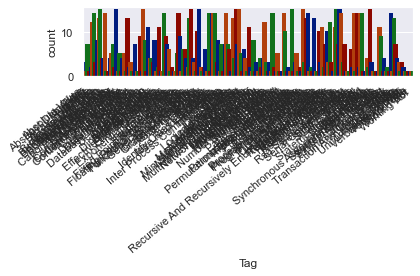

In [281]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Tag",linewidth=3,edgecolor=sns.color_palette("dark", 4), data=my_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [282]:
my_data['my_id'] = my_data['Tag'].factorize()[0]
category_id_df = my_data[['Tag', 'my_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['my_id', 'Tag']].values)
 

# New dataframe
my_data.head(10)

,Question,Tag,my_id
0,The expression large frac x y x y 2 is equal t...,Absolute Value,0
1,If x is real and mid x 2 2x 3 mid 11 then poss...,Absolute Value,0
2,If mid 4X 7 mid 5 then the values of 2 mid X ...,Absolute Value,0
3,An Abstract Data Type ADT is same as an abstra...,Abstract Data Type,1
4,The number of full and half adders required to...,Adder,2
5,Fill in the blanks In the two bit full adder s...,Adder,2
6,Consider the ALU shown below If the operands a...,Adder,2
7,Consider an eight bit ripple carry adder for c...,Adder,2
8,An N bit carry lookahead adder where N is a mu...,Adder,2
9,A 4 bit carry look ahead adder which adds two ...,Adder,2


In [283]:
Tfidf_vect = TfidfVectorizer(max_features=1800)
Tfidf_vect.fit(my_data['Question'])
Tfidf_vect.vocabulary_


{'the': 1592,
 'expression': 601,
 'large': 870,
 'frac': 657,
 'is': 827,
 'equal': 565,
 'to': 1615,
 'maximum': 970,
 'of': 1074,
 'and': 196,
 'minimum': 991,
 'none': 1053,
 'above': 144,
 'if': 757,
 'real': 1287,
 'mid': 987,
 '2x': 60,
 '11': 12,
 'then': 1595,
 'possible': 1190,
 'values': 1717,
 'include': 773,
 '14': 19,
 '52': 90,
 '4x': 84,
 'quad': 1257,
 'left': 883,
 'dfrac': 496,
 'right': 1348,
 'an': 195,
 'data': 449,
 'type': 1654,
 'same': 1384,
 'as': 216,
 'class': 346,
 'that': 1591,
 'cannot': 310,
 'be': 248,
 'for': 646,
 'which': 1750,
 'only': 1082,
 'operations': 1088,
 'defined': 464,
 'on': 1079,
 'it': 830,
 'can': 308,
 'used': 1706,
 'but': 297,
 'else': 541,
 'all': 177,
 'number': 1064,
 'full': 668,
 'half': 712,
 'adders': 161,
 'required': 1327,
 'add': 159,
 '16': 22,
 'bit': 267,
 'numbers': 1066,
 'adder': 160,
 '15': 20,
 '12': 14,
 'fill': 627,
 'in': 772,
 'two': 1653,
 'unit': 1694,
 'shown': 1454,
 'below': 257,
 'figure': 625,
 'when': 

In [284]:
X_train, X_test, y_train, y_test = train_test_split(my_data['Question'],my_data['my_id'], test_size=0.5)

In [285]:
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [286]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=4, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score is ",accuracy_score(predictions_SVM, y_test)*100)
print("SVM F1-score Score is ",f1_score(y_test, predictions_SVM, average='weighted'))

SVM Accuracy Score is  34.81349911190053
SVM F1-score Score is  0.2863591368361


In [287]:
my_new_data = pd.read_csv('test.csv')
my_new_data
# Tfidf_vect.fit(my_data['Question'])
# Tfidf_vect.vocabulary_
new_Train_X_Tfidf = Tfidf_vect.transform(my_new_data['Question'])


In [288]:

# predict the labels on validation dataset
predictions_SVM = SVM.predict(new_Train_X_Tfidf)


In [289]:
# solution = pd.read_csv('solution.csv')

# temp = solution["Tag"]
# # print("SVM Accuracy Score is ",accuracy_score(predictions_SVM, y_test)*100)
# # print("SVM F1-score Score is ",f1_score(y_test, predictions_SVM, average='weighted'))

In [290]:
# f = temp.tolist()
# for i in range(len(f)):   
#     f[i] = category_to_id[f[i]]
#     print(f[i],i)

In [291]:
# print("SVM F1-score Score is ",f1_score(f, predictions_SVM, average='weighted'))

In [292]:
f = predictions_SVM.tolist()
for i in range(len(f)):   
    f[i] = id_to_category[f[i]]
    print(f[i])

Number Representation
Logical Reasoning
Probability
Heap
Logical Reasoning
Linked Lists
Process Synchronization
Functions
Relational Algebra
Sliding Window
Recursive And Recursively Enumerable Languages
Process Schedule
Functional Dependencies
Eigen Value
Identify Class Language
Tcp
Sql
Regular Expressions
Regular Expressions
Identify Class Language
Degree Of Graph
Stack
Pushdown Automata
Groups
Threads
Eigen Value
Logical Reasoning
Functional Dependencies
Relational Calculus
Functional Dependencies
Network Protocols
Context Free Language
Sql
Identify Class Language
Graph Connectivity
Recursive And Recursively Enumerable Languages
Logical Reasoning
Sql
Sql
Recursive And Recursively Enumerable Languages
Regular Expressions
Binary Tree
Degree Of Graph
Context Free Language
Process Synchronization
Regular Expressions
Regular Expressions
Recursive And Recursively Enumerable Languages
Functions
Functions
Sets
Groups
Process Schedule
Regular Expressions
Regular Expressions
Relational Algebra